In [22]:
import numpy
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
# import embeddings
data = numpy.genfromtxt("embed_sentence.csv", delimiter=',')
data = data[1:,1:] # remove header and key

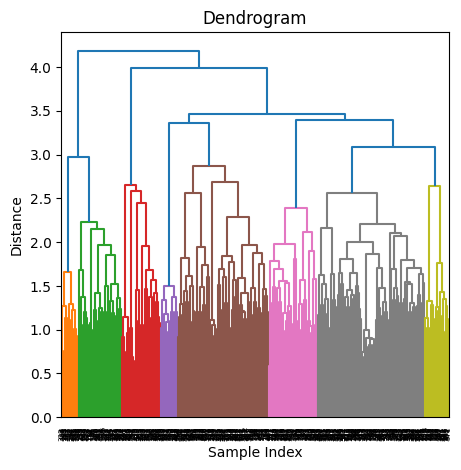

In [24]:
# Generate the linkage matrix
Z = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(5, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [41]:
agg_clustering = AgglomerativeClustering(n_clusters=20)
y_pred = agg_clustering.fit_predict(data)

ValueError: could not convert string to float: '51831d3f-cb5f-4ce1-94df-f56b7b9fea23'

In [39]:
y_pred

array([ 5,  7,  9,  8, 11,  1, 16,  4,  6, 15,  5,  3,  4, 16,  3,  2,  2,
        8,  2,  3, 16, 12, 16,  4,  6,  1,  9,  1, 18,  6, 14,  7,  1, 16,
        9,  4,  6,  1,  6,  5,  2,  4,  6,  4,  1,  1,  1,  1, 18,  2,  3,
        1,  0,  3,  0,  0,  4,  9,  4, 16,  9,  4,  4, 14,  4,  9,  1,  9,
        4, 14,  4,  9, 14, 13, 17,  1,  3, 15, 14,  6,  4,  4,  0,  7, 18,
       19,  7,  2,  9, 17,  7,  9, 11,  6,  3,  3,  6,  1,  4, 10, 13,  5,
        8, 14, 13, 16,  6,  8,  7,  8,  6,  1, 19,  8,  8, 19,  6, 18,  1,
       16, 11,  4,  6,  3,  4,  9,  7,  1, 19,  3, 16,  9, 11,  9,  2, 18,
        6, 17, 18,  5, 14,  9,  9,  2, 16,  9,  7,  4,  6,  4,  5,  3,  3,
        0,  1,  4, 17,  3,  9,  2,  9, 10,  4,  3, 10,  9,  7,  6,  1,  7,
        4,  0,  9,  5, 18,  9,  8,  4,  3, 11, 15, 16,  1,  7, 17,  3, 14,
        0,  4,  0,  4, 17,  5, 18,  8,  6,  3,  9, 18,  8,  9,  2,  6,  7,
        1, 11,  3, 14,  2,  9,  2,  8,  0,  4,  5,  4, 14, 10,  9, 11, 14,
        1,  6,  4, 10, 17

In [26]:
agg_clustering.n_clusters

20

In [27]:
# for viz only
pca = PCA(n_components=2)
data_r = pca.fit(data).transform(data)

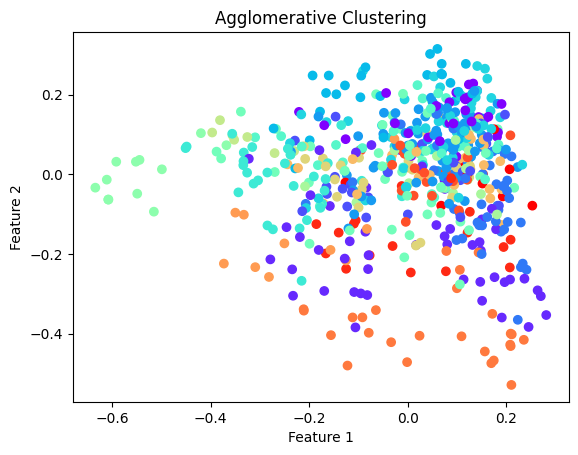

In [28]:
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_pred, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [29]:
# Export data
import pandas
data = pandas.read_csv('data_clean.csv')
data['bert_cluster_hierarchical'] = y_pred
data.to_csv('data_out_sentence_short.csv')

In [32]:
# Analysis - clusters
data['bert_cluster_hierarchical'].value_counts()

bert_cluster_hierarchical
4     79
6     55
1     50
9     48
3     44
8     33
7     31
0     31
2     30
14    27
5     26
16    26
13    22
17    21
18    17
11    16
10    12
15    10
19    10
12     7
Name: count, dtype: int64

0


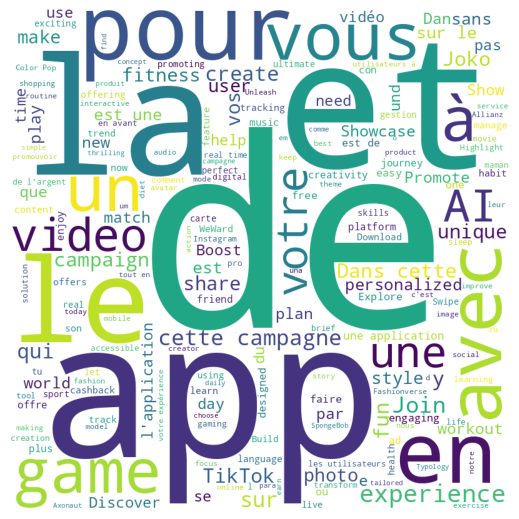

1


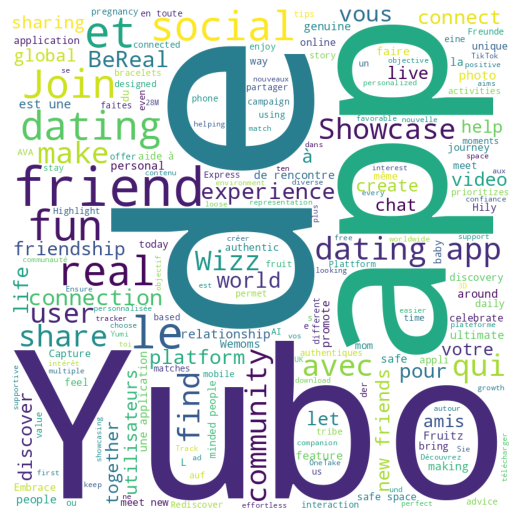

2


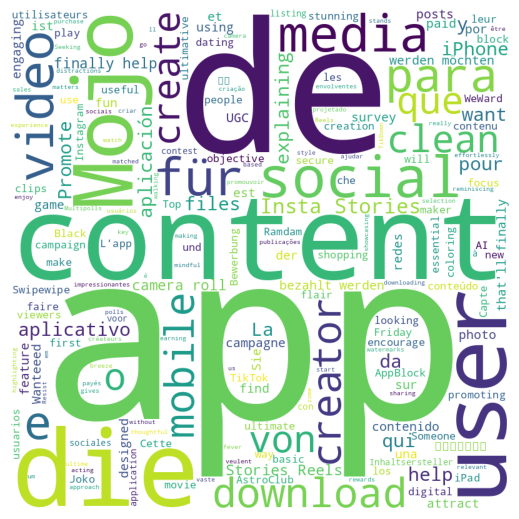

3


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [20]:
# Analysis - word cloud
from wordcloud import WordCloud, STOPWORDS
for i in range(14):
    print(i)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords=set(STOPWORDS),
                    min_font_size = 10).generate(" ".join(data['short_description'][data['bert_cluster_hierarchical'] == i].to_list()))
    
    # plot the WordCloud image                       
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()